# Exercise 1

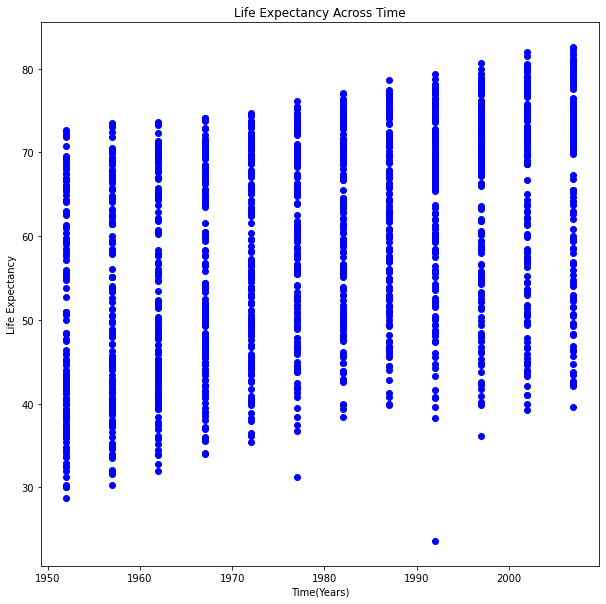

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
# Turn off warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Plot all of the points as a scatter plot
fig, plot = plt.subplots(figsize=(10, 10))
plot.set_title('Life Expectancy Across Time')
plot.set_xlabel("Time(Years)")
plot.set_ylabel("Life Expectancy")
# Get data from file and convert into a data frame
life_data = pd.read_csv("gap.tsv", sep='\t')
plot.scatter(life_data['year'], life_data['lifeExp'], color = "blue")
# x-axis for the plot is time in years and y-axis is the life expectancy 

Text(0, 0.5, 'Life Expectancy')

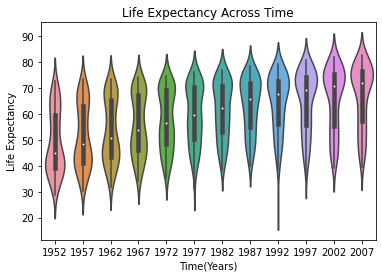

In [ ]:
import seaborn as sns
v_plot = sns.violinplot(data = life_data, x="year", y="lifeExp", figsize=(10, 10))
v_plot.set_title('Life Expectancy Across Time')
v_plot.set_xlabel("Time(Years)")
v_plot.set_ylabel("Life Expectancy")

# Plot the distribution of the data as a violin plot
# x-axis for the plot is time in years and y-axis is the life expectancy 

# Question 1
The general trend life expectancy is following is that it is gradually increasing as time progresses. This would make sense since technological advancements in medicine would allow more people to stay healthier for longer periods of time. As seen from the plots, both the minimum life expectancy and maximum life expectancy tend to be increasing over time. The trend seems to be linear since the change looks gradual but constant.  

# Question 2 
The distribution of life expectancy across countries for individual years differs from year to year. From around 1952 to around 1957, the distribution is unimodal and skewed towards the top. Then from 1957 to 1982, the data distribution becomes more bimodal and not skewed. Starting around 1982, the data distribution goes back to unimodal but is now skewed downward. The time range from 1962 to 1967 seems to host the only distributions that look like they are symmetric around its center.

# Question 3
We will reject the null hypothesis because based on the violin plots, as time increases so does life expectancy. We can see that there is a clear relationship between the year and life expectancy. We can see that as time progresses the distribution of life expectancies also change with it. At first, the distribution is unimodal and skewed upwards but as time progresses the distribution goes from bimodal to eventually being unimodal with the skew going downwards. Based on these observations, we can conclude that there exists a relationship between the variables year and life expectancy.

# Question 4
The violin plots of residuals vs year should look homogenous with the plots in exercise one because the resiudals do not affect the structure of the data. Thus the data would be plotted in a similar manner and the violin plots would also follow a simmilar distribution/pattern. 

# Question 5
Based on the assumptions of the linear regression model, the violin plots should all be normally distributed, unimodal, and symmetric around the center. Since it is assumed that all the variances of the residuals are the same for any independent variable X, we should see that all of the plots have the same characteristics and follow the same distribution. Assuming that there is no variation in year and life expectancy that is not explained, there should be noise within the data. This would indicate that the plots follow the description I stated before. The issue is that time is not the only thing affecting life expectancy. The area/continent in which the data is accumulated is also affecting life expectancy so there is an underlying factor that causes the data to be noisy. I do not think that everything is okay because just plotting the residuals of the year vs life expectancy does not portray the whole picture.

# Exercise 2


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm

# declare and intialize linear regression object
linear = linear_model.LinearRegression()
exp = life_data['lifeExp'].array
year = life_data['year'].array  
# Fit the model with year array and life expectancy data from data frame
linear.fit(year.reshape(-1, 1), exp)

# Use ordinary least squares to fit the data and use ols to read only the year and life expectancy data.
first = sm.OLS.from_formula('lifeExp ~ year', life_data).fit()
# Using the linear regression object print the coefficient and intercept from the model
print("Linear Regression Formula: " + str(linear.coef_[0]) + "x + " + str(linear.intercept_) + "\n")

# Double check the values are correct by running the ols summary to compare the coefficients and intercepts
first.summary()

Linear Regression Formula: 0.3259038276371518x + -585.6521874415448



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           7.55e-80
Time:                        22:32:37   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 6
On average the life expectancy increases by
0.3259038276371518 years around the world every year.

# Question 7 
I will reject the null hypothesis because there is a linear relationship such that as time passes, life expectancy also increases with it. We can see from the violin plots and the slope of the regression line that the relationship exists and is positive. The slope of the regression line is positive and this indicates that there is a positive relationship between year and life expectancy. The p-value is very small that it is close to 0 and this would mean that we reject the null hypothesis. 
 

# Exercise 3

Text(0, 0.5, 'Residuals')

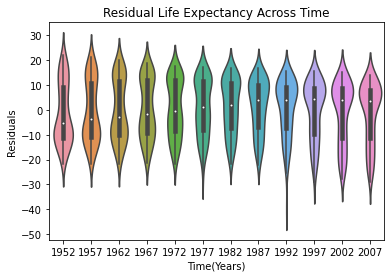

In [ ]:
# Turn off warnings
pd.set_option('mode.chained_assignment', None)
# Set dummy column with all float values equal to 0.0
life_data["residuals"] = 0.0

# Iterate through each row in the residual column and replace the value with its corresponding residual
# The formula I used to caluclate residual was "observed_y - predicted_y"
for index, row in life_data.iterrows():
  life_data["residuals"][index] = ( row["lifeExp"] - linear.predict([[row["year"]]]))

# Plot the column for residual vs time in years.
plot_res = sns.violinplot(data = life_data, x="year", y="residuals")
plot_res.set_title('Residual Life Expectancy Across Time')
plot_res.set_xlabel("Time(Years)")
plot_res.set_ylabel("Residuals")

# x-axis for the plot is time in years and y-axis is the residuals

# Question 8
The plot slightly differed from what I had expected. I expected a majority of the plots to be identical but only the distribution, wether it was unimodal or not, and the skew stayed the same. The spread of the violin plots throughout the years differed. I expected the residuals to decrease as time progressed because the spread towards the later years was a lot less than in previous years. I was mistaken because the residuals tended to decrease towards the middle years and were abundant in the exterior years.



# Exercise 4

Text(0, 0.5, 'Residuals')

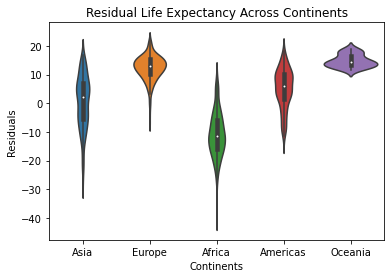

In [ ]:
# Plot the residuals based on continent it is assigned to
plot_cont = sns.violinplot(data = life_data, x="continent", y="residuals", figsize=(10, 10))
plot_cont.set_title('Residual Life Expectancy Across Continents')
plot_cont.set_xlabel("Continents")
plot_cont.set_ylabel("Residuals")
# x-axis for the plot is continents and y-axis is the residuals

# Question 9
There seems to be a dependence between model residual and continent because the residuals greatly differ between continents. This would suggest that there is a dependence because different values of continents affect the residuals a little differently. This might be due to the fact that different continents have different rates of life expectancy change concerning time. If we were to conduct a regression analysis with only time and life expectancy we would be led astray by the results because the continent value also influences life expectancy. There would underlying factors that would not be accounted for if we only analyzed life expectancy across time.

# Exercise 5


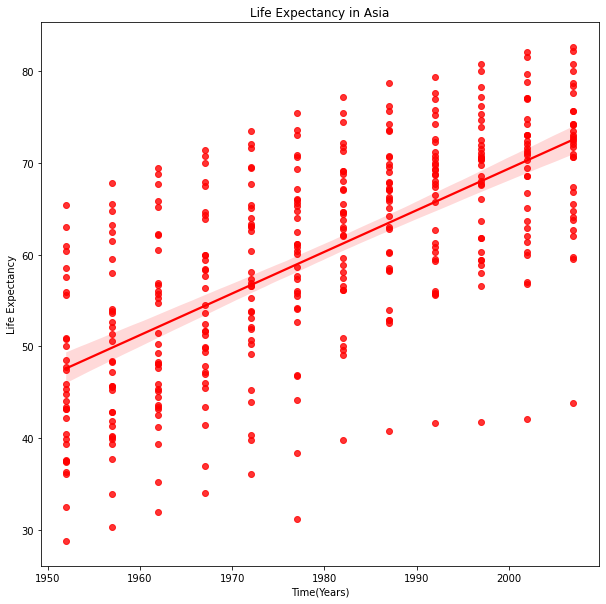

In [ ]:
# Plot Life expectancy vs year for the Asian Continent
fig, asia_plot = plt.subplots(figsize=(10, 10))
# Get only data marked as apart of the Asian continent
asia = life_data[life_data.continent == "Asia"]
# Plot the points corresponding to Asia continent data and implement regression line using regplot
asia_plot = sns.regplot(asia.year, asia.lifeExp, color = "red")
asia_plot.set_title('Life Expectancy in Asia')
asia_plot.set_xlabel("Time(Years)")
asia_plot.set_ylabel("Life Expectancy")
life_exp = asia.lifeExp.array
year = asia.year.array

# x-axis for the plot is time in years and y-axis is the life expectancy 

Text(0, 0.5, 'Life Expectancy')

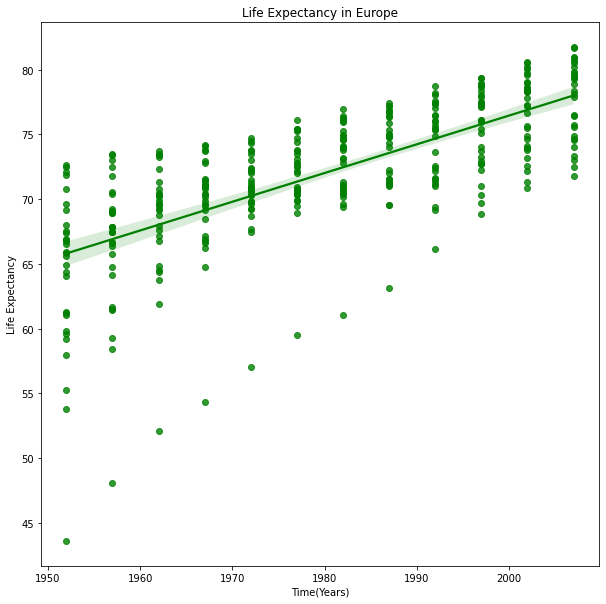

In [ ]:
# Plot Life expectancy vs year for the Europe Continent
fig, europe_plot = plt.subplots(figsize=(10, 10))
# Get only data marked as apart of the European continent
europe = life_data[life_data.continent == "Europe"]
# Plot the points corresponding to Europe continent data and implement regression line using regplot
europe_plot = sns.regplot(europe.year, europe.lifeExp, color = "green")
europe_plot.set_title('Life Expectancy in Europe')
europe_plot.set_xlabel("Time(Years)")
europe_plot.set_ylabel("Life Expectancy")

# x-axis for the plot is time in years and y-axis is the life expectancy 

Text(0, 0.5, 'Life Expectancy')

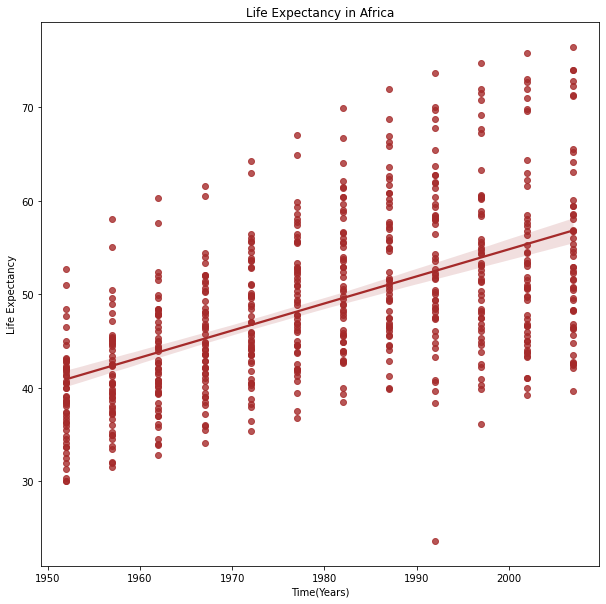

In [ ]:
# Plot Life expectancy vs year for the Africa Continent
fig, africa_plot = plt.subplots(figsize=(10, 10))
# Get only data marked as apart of the African continent
africa = life_data[life_data.continent == "Africa"]
# Plot the points corresponding to Africa continent data and implement regression line using regplot
africa_plot = sns.regplot(africa.year, africa.lifeExp, color = "brown")
africa_plot.set_title('Life Expectancy in Africa')
africa_plot.set_xlabel("Time(Years)")
africa_plot.set_ylabel("Life Expectancy")

# x-axis for the plot is time in years and y-axis is the life expectancy 

Text(0, 0.5, 'Life Expectancy')

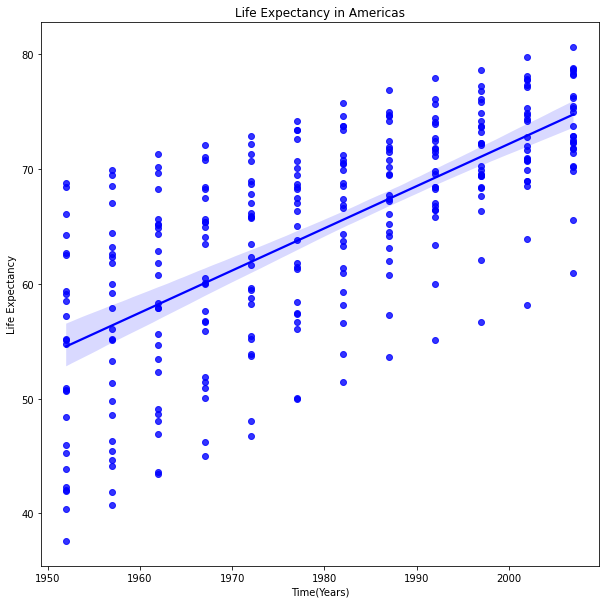

In [ ]:
# Plot Life expectancy vs year for the America Continent
fig, america_plot = plt.subplots(figsize=(10, 10))
# Get only data marked as apart of the American continent
america = life_data[life_data.continent == "Americas"]
# Plot the points corresponding to America continent data and implement regression line using regplot
america_plot = sns.regplot(america.year, america.lifeExp, color = "blue")
america_plot.set_title('Life Expectancy in Americas')
america_plot.set_xlabel("Time(Years)")
america_plot.set_ylabel("Life Expectancy")

# x-axis for the plot is time in years and y-axis is the life expectancy 

Text(0, 0.5, 'Life Expectancy')

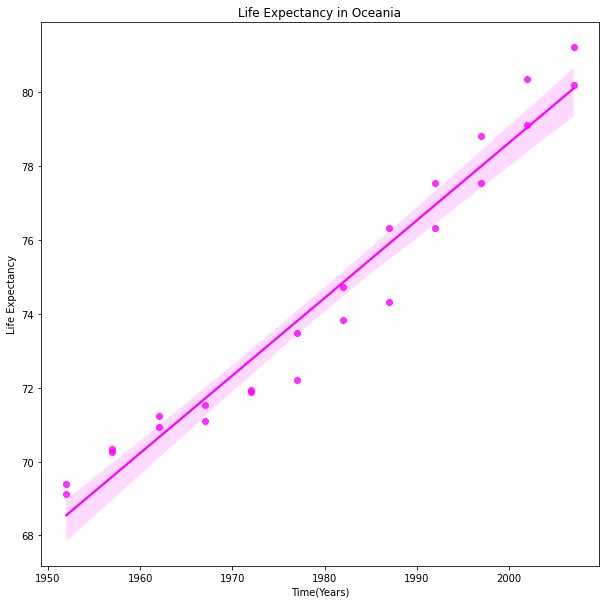

In [ ]:
# Plot Life expectancy vs year for the Oceania Continent
fig, oceania_plot = plt.subplots(figsize=(10, 10))
# Get only data marked as apart of the Oceanian continent
oceania = life_data[life_data.continent == "Oceania"]
# Plot the points corresponding to Oceania continent data and implement regression line using regplot
oceania_plot = sns.regplot(oceania.year, oceania.lifeExp, color = "magenta")
oceania_plot.set_title('Life Expectancy in Oceania')
oceania_plot.set_xlabel("Time(Years)")
oceania_plot.set_ylabel("Life Expectancy")

# x-axis for the plot is time in years and y-axis is the life expectancy 

# Question 10
Based on the plots and regression lines of the continents plot, there should be an interaction term because the various values for the continent variable affect the value of life expectancy differently. This is seen by the drastically different regression lines and slopes for each continent across time. The effect of the independent variable, continents, on the dependent variable, life expectancy, changes based on the different values within the continent category so an interaction term is required. 

# Exercise 6

In [ ]:
from patsy import dmatrices
from statsmodels.formula.api import ols
import statsmodels.api as sm

y, X = dmatrices('lifeExp ~  year * continent', life_data, return_type = 'dataframe')
# Get interaction terms between year and continent while one hot encoding continent using OLS.from_formula
# Then fit the model of ols for the data including the interaction terms
# Print the coefficients for each paramater and then double check that they match with the summary
result = sm.OLS.from_formula('lifeExp ~ year * continent', life_data).fit()
print("Coefficients: \n" + str(result.params))
result.summary()

Coefficients: 
Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:32:40   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -524.2578     32.963    -15.904      0.000    -588.911    -459.605
continent[T.Americas]       -138.8484     57.851     -2.400      0.016    -252.315     -25.382
continent[T.Asia]           -312.6330     52.904     -5.909      0.000    -416.396    -208.870
continent[T.Europe]          156.8469     54.498      2.878      0.004      49.957     263.737
continent[T.Oceania]         182.3499    171.283      1.065      0.287    -153.599     518.298
year                           0.2895      0.017     17.387      0.000       0.257       0.322
year:continent[T.Americas]     0.0781      0.029      2.673      0.008       0.021       0.135
year:continent[T.Asia]         0.1636      0.027      6.121      0.000       0.111       0.216
year:continent[T.Europe]      -0.0676      0.028     -2.455      0.014      -0.122      -0.014
year:continent[T.Oceania]     -0.0793      0.087     -0.916      0.360      -0.249       0.090
==============================================================================
Omnibus:                       27.121   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.106
Skew:                          -0.121   Prob(JB):                     2.65e-10
Kurtosis:                       3.750   Cond. No.                     2.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 11
All of the parameters except Oceania and year:Oceania are significantly different than 0 at the 0.05 significance level. This is seen by the p values of these parameters being over 0.05 thus being classified as not significantly different from 0.

# Question 12
The data is clearly labeled and extracted in my exercise 6 code. The "result.summary()" line prints out a table with the coefficients for each continent per year. These coefficients represent the slope of the regression line for each continent and thus represent the average change in life expectancy of these continents.

1.   Asia: 0.1636
2.   Americas: 0.0781
3.   Europe:	-0.0676
4.   Oceania:	-0.0793
5.   Africa:   0.2895

We can see that the Asian continent's life expectancy on average increases by 0.1636 years every year, Americas life expectancy on average increases by 0.0781 years ever year, Europe's life expectancy on average decreases by  0.0676 years every year, and Oceania's life expectancy on average decreases by 0.0793 years per year.



# Exercise 7

Text(0, 0.5, 'Residuals')

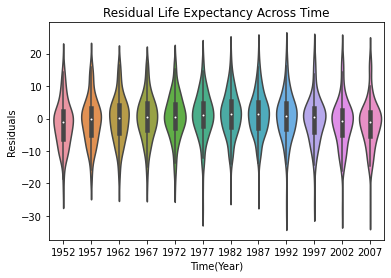

In [ ]:
# Get the residuals of the model using .resid and place into column of data frame
life_data['inter_resid'] = result.resid
# Plot the residuals of the model with respect to time in years as a violin plot
plot_resid = sns.violinplot(data = life_data, x = "year", y = "inter_resid", figsize=(10, 10))
plot_resid.set_title('Residual Life Expectancy Across Time')
plot_resid.set_xlabel("Time(Year)")
plot_resid.set_ylabel("Residuals")

# x-axis for the plot is time in years and y-axis is the residuals of the model
# The residual plot matches the assumption of the linear regression model accurately. 
# It is assumed that the variance of the residuals stays the same for all of the x values and 
# based on the plots the distrubtion and variance seems to be very similar for every x value.
# We can see that the plots are symmetric around the center and seem to have a linear relationship.

# Part 2

# Data Explanation

The data set I am using is the wine dataset that sklearn has. The data has 3 different classes in which the data is classified, 178 samples, 13 columns/dimensions, and the features real and positive. I decided to use a decision tree and knn for the classification of the different wine samples. I expect the decision tree to classify the wines a lot better because this model has automatic feature interaction while knn does not support this feature.

# Decision Tree

In [ ]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Get sklearn wine data set
wine = datasets.load_wine()
X, y = wine.data, wine.target
# Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# hyperparameter is 5 since this consisitently results in the best accuracy for the test set and 
# the highest average of the 10 fold cross validation score.
# I inputted various depths and 5 depths seemed to output the best accuracy for the model
# I checked to make sure this was the case by using gridsearch in the next code cell
dtree_class = tree.DecisionTreeClassifier(max_depth = 13, criterion = "entropy") 
# Train the model on the training set
dtree_class = dtree_class.fit(X_train, y_train)
# Test the model on the test sets
print("Test Set Accuracy: " + str(dtree_class.score(X_test,y_test)))
print("Test Set Confusion Matrix: \n" + str(confusion_matrix(y_test, dtree_class.predict(X_test))))
print("Test Set Evaluation Metrics: \n" + str(classification_report(y_test, dtree_class.predict(X_test), target_names= wine.target_names, zero_division = False)))
# Use cross_val_score to implement 10 Fold Cross Validation Scores
score = cross_val_score(dtree_class, X, y, cv = 10, scoring = "accuracy")
print("10 Fold Cross Validation Scores: " + str(score))
print("Average: " + str(score.mean()))

Test Set Accuracy: 0.9555555555555556
Test Set Confusion Matrix: 
[[15  1  0]
 [ 0 20  1]
 [ 0  0  8]]
Test Set Evaluation Metrics: 
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        16
     class_1       0.95      0.95      0.95        21
     class_2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

10 Fold Cross Validation Scores: [0.94444444 0.94444444 0.83333333 0.88888889 0.88888889 0.94444444
 1.         0.94444444 1.         0.76470588]
Average: 0.9153594771241831


In [ ]:
# Use gridsearch to find the best hyperparameter: max_depth for the decision tree
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13]}]
param_search = GridSearchCV(dtree_class, parameters, scoring = 'accuracy')
param_search.fit(X_train, y_train)
print(param_search.best_params_)

{'max_depth': 5}


# KNN Classifier

In [ ]:
import sklearn


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# hyperparameter: K is 15 since this results in one of the smallest error rates of all of the Ks
# I checked to make sure this was the case by using gridsearch in the next code cell
neigh = KNeighborsClassifier(n_neighbors = 15)
# Train the model on the training set
neigh.fit(X_train, y_train)
# Test the model on the test sets
print("Test Set Accuracy: " + str(neigh.score(X_test, y_test)))
print("Test Set Confusion Matrix: \n" + str(confusion_matrix(y_test, neigh.predict(X_test))))
print("Test Set Evaluation Metrics: \n" + str(classification_report(y_test, neigh.predict(X_test), target_names = wine.target_names, zero_division = False)))

# Use cross_val_score to implement 10 Fold Cross Validation Scores
score1 = cross_val_score(neigh, X, y, cv = 10, scoring = "accuracy")

print("10 Fold Cross Validation Scores: " + str(score1))
print("Average Accuracy: " + str(score1.mean()))

Test Set Accuracy: 0.8
Test Set Confusion Matrix: 
[[15  0  1]
 [ 0 15  6]
 [ 0  2  6]]
Test Set Evaluation Metrics: 
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        16
     class_1       0.88      0.71      0.79        21
     class_2       0.46      0.75      0.57         8

    accuracy                           0.80        45
   macro avg       0.78      0.80      0.78        45
weighted avg       0.85      0.80      0.81        45

10 Fold Cross Validation Scores: [0.77777778 0.72222222 0.61111111 0.72222222 0.66666667 0.66666667
 0.72222222 0.72222222 0.76470588 0.82352941]
Average Accuracy: 0.7199346405228757
Average Error: -0.46535947712418296


In [ ]:
# Use gridsearch to find the best hyperparameter: K for the KNN
parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15, 16 , 17 , 18, 19, 20]}]
param_search = GridSearchCV(neigh, parameters, scoring = 'accuracy')
param_search.fit(X, y)
print(param_search.best_params_)

{'n_neighbors': 15}


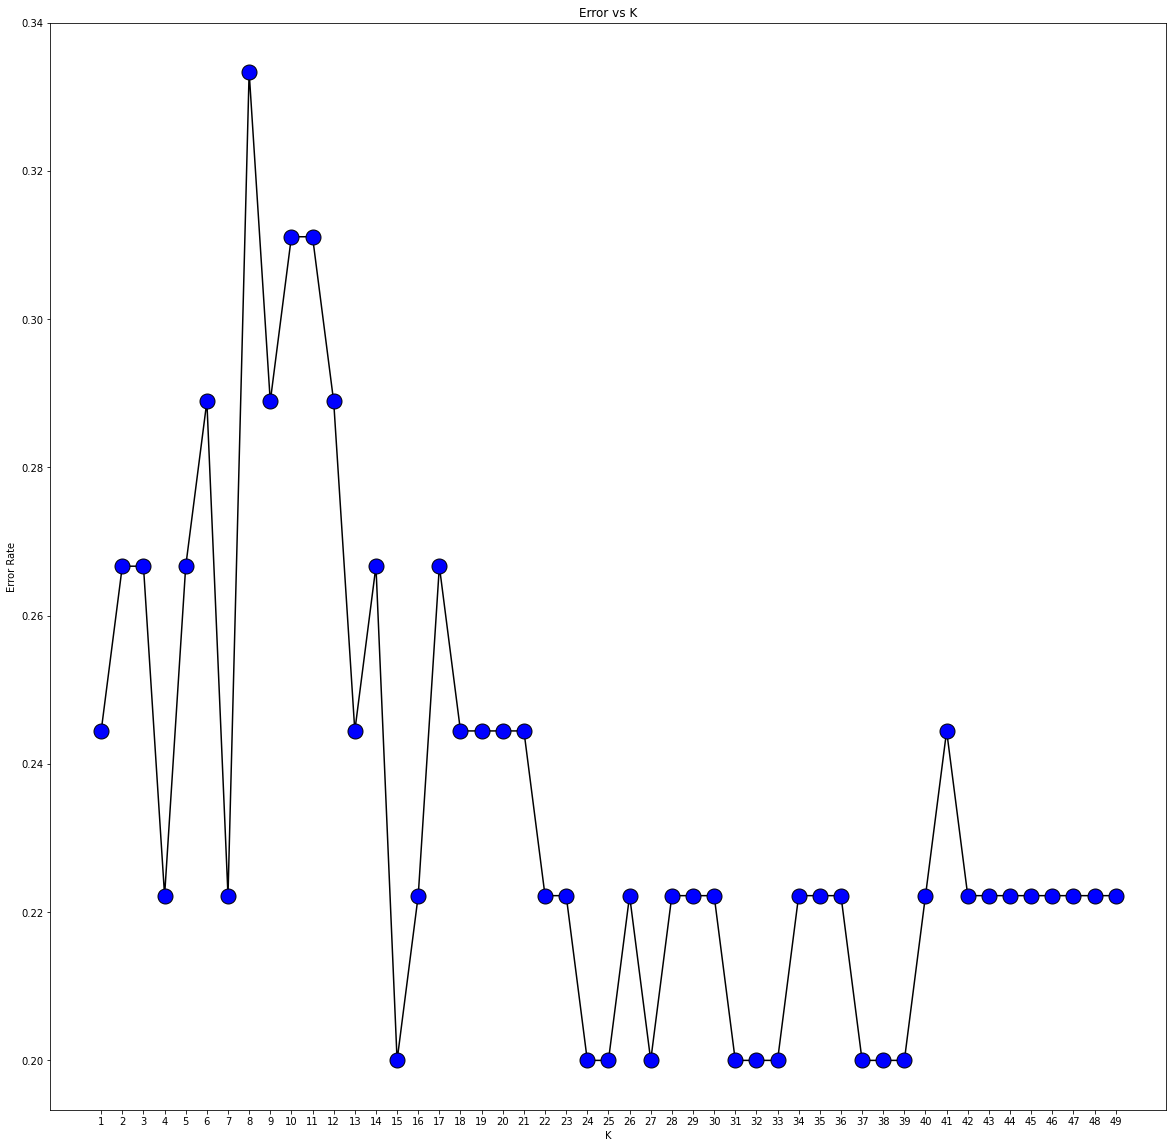

In [ ]:
# The i with the lowest error should be the best value for K 
error=[]
for i in range (1,50):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    error.append(np.mean(clf.predict(X_test) != y_test))
# Plot and observe the lowest error rate
plt.figure(figsize=(20,20))
plt.plot(range(1,50),error,marker="o",markerfacecolor="blue", color="black",markersize=15)
plt.title("Error vs K")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.xticks(range(1,50))
plt.show()

# Comparison

In [ ]:
from mlxtend.evaluate import paired_ttest_kfold_cv
# perform paired t-test on the decision tree and knn models
t, p = paired_ttest_kfold_cv(estimator1=dtree_class, estimator2=neigh, X=X, y=y)
print("T Test value: " + str(t))
print("P Test value: " + str(p))

# The p value is drastically less than 0.05 so this would suggest the difference in the 
# data is siginifcant and we can reject the null hypothesis of no difference.
# Since the t value is positive and on the larger side, we can say that groups are different. 
# This supports the idea that we reject the null hypothesis of no difference.

T Test value: 4.667826886793748
P Test value: 0.0011721841047056948


The performance metric I used when evaluating the K nearest neighbor and decision tree was accuracy. When fitting the model with the training set and testing the model with the test set, the accuracy was significantly higher when I used the decision tree to classify whether the wine was in class_0, class_1, or class_2. The accuracy for the decision tree was in the 93%-95% range but when I used KNN the accuracy was around 78%-80%. After using training and test sets alone, I implemented the 10 Fold Cross Validation method based on accuracy. All of the scores and the average of the 10 folds for the two models further supported the claim that the decision tree is much more accurate and better at fitting the wine data set. To find the best hyperparameters for both the KNN and decision tree model I used grid search.